<a href="https://colab.research.google.com/github/mattheweisenberg6/MAT421/blob/main/ModuleB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**17.1 Interpolation Problem Statement**

The problem statement involves an independent data set x and dependent data set y where we estimate (interpolate) the actual value of y. Interpolation does not need an underlying model like regression, however, the processes that underlie the data inform the user about the characteristics of said data.

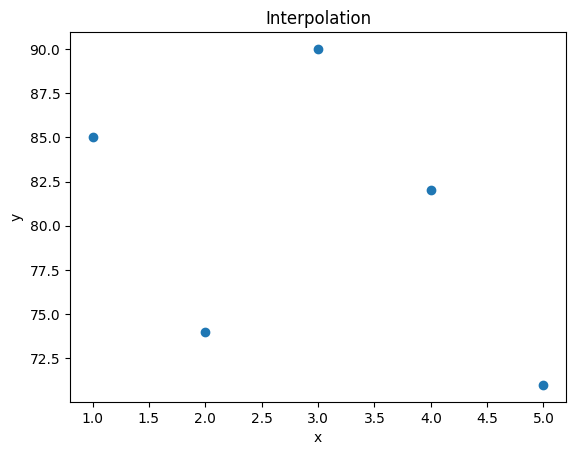

In [2]:
import matplotlib.pyplot as plt
data = ([85, 74, 90, 82, 71], [1, 2, 3, 4, 5], 'o')
plt.plot(data[1], data[0], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation')
plt.show()

**17.2 Linear Interpolation**

For linear interpolation the point is assumed to be in the middle of the left and right points between it. If we assumed that the points are in ascending order, then we get the equation y^(x)=(yi+(yi+1−yi))/((x−xi)(xi+1−xi)).


In [3]:
#Example for interpolating x(1.5) given data x = [0,1,2] and y = [1,3,2]
#Since 1 < x < 2 we use values 3 for yi and 2 for yi+1. 1 is for xi and 2 for xi+1

y = 3 + ((2-3)*(1.5-1))/(2-1)
print(y)

2.5


4.4


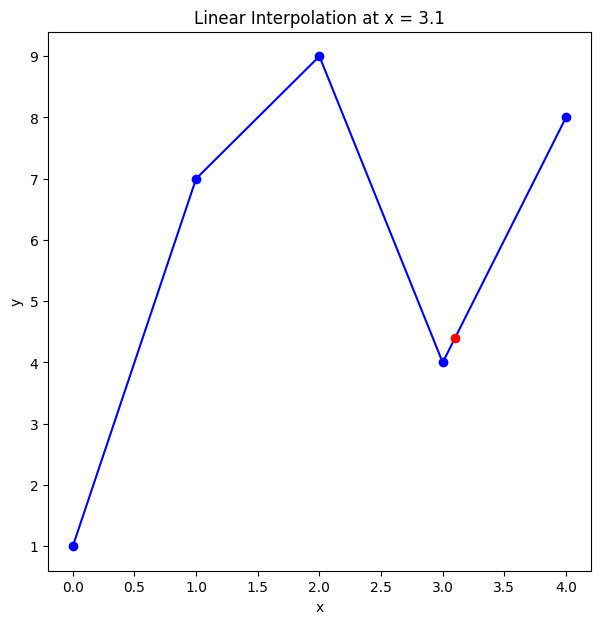

In [17]:
#use matlab built in function to interpolate x(3.1)
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4]
y = [1, 7, 9, 4, 8]

f = interp1d(x, y)
y_hat = f(3.1)
print(y_hat)

plt.figure(figsize = (7,7))
plt.plot(x, y, '-ob')
plt.plot(3.1, y_hat, 'ro')
plt.title('Linear Interpolation at x = 3.1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


**17.3 Cubic Spline Interpolation**

Cubic spline interpolation uses a set of piecewise cubic functions to interpolate on a value. The cubic function is as shown: Si(x)=aix3+bix2+cix+di. Since there are 4 coefficients there at 4(n-1) unknowns for n points which means we require 4(n-1) independent equations. We can develop two final equations on each side of the point we wish to interpolate to establish a boundary.



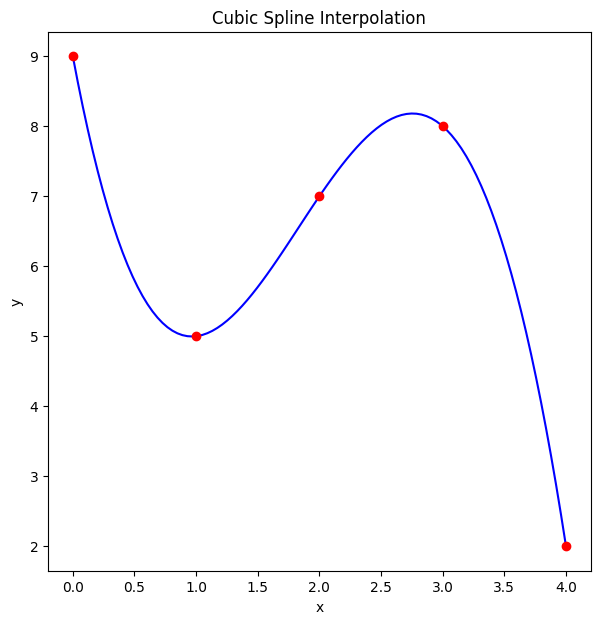

In [20]:
#Graphing and interpolating x and y data set

from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

x = [0,1,2,3,4]
y = [9,5,7,8,2]

f = CubicSpline(x, y)
x_hat = np.linspace(0, 4, 100)
y_hat = f(x_hat)

plt.figure(figsize=(7,7))
plt.plot(x_hat, y_hat, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

To ulimately find the 4(n-1) unknowns, we can use the constraints to create a system of linear equations to explicity solve for the unknowns for each side of our interpolated point.

In [22]:
#Finding 4(n-1) unknowns with (a,b) to interpolate x(1.5)

b = np.array([1, 3, 3, 2, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
             [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])

np.dot(np.linalg.inv(A), b)

#this gives us S1(x) =−0.75x^3 + 2.75x +1, for 0≤x≤1
#S2(x)= 0.75x^3 − 4.5x^2 + 7.25x − 0.5, for 1≤x≤2

x = 0.75*(1.5)**3 - 4.5*(1.5)**2 +7.25*1.5 - 0.5
print(x)

2.78125
